In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Parameter Assignment

# For Array Parameter
# nDL: number of WL in one DL, nWL: number of DL in one WL, Cs: cell Capacitance, Cd_p_C: digitline capacitance per cell, Cd: digitline capacitance
nDL = 1440
nWL = 513
Cs = 4.5e-15
### WL Cap variant
Cd_p_C = 20.2e-18 + 1.2e-18
Cd = Cd_p_C * nDL
### SA Cap 
Caablb = 0.6449e-15
Caablt = 1.5527e-15
Caagutb = 0.7239e-15
Caagutt = 0.7136e-15

# For Accelerator
# W_w: weight width, Res_MAC: MAC reset (digitline) voltage
W_w = 3 * 3
Res_MAC = 0.5

# For DAC
# DAC_bw: bit width of DAC code, Res_DAC: DAC reset (DL_ref) voltage
DAC_bw = 6
Res_DAC = 0.5

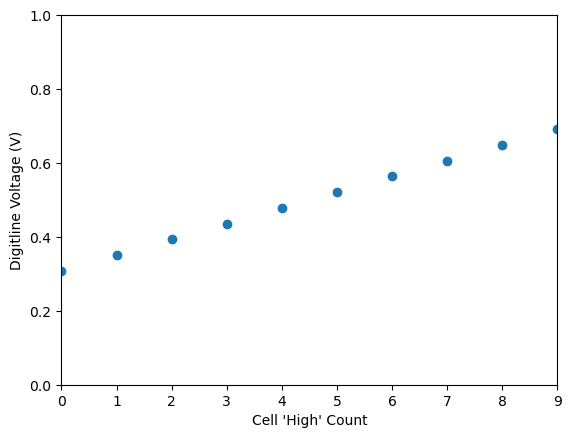

   C1 Count   Voltage
0       0.0  0.308542
1       1.0  0.351088
2       2.0  0.393634
3       3.0  0.436181
4       4.0  0.478727
5       5.0  0.521273
6       6.0  0.563819
7       7.0  0.606366
8       8.0  0.648912
9       9.0  0.691458


In [3]:
# In-digitline voltage level for DLA
x1 = np.array([])
y1 = np.array([])
for cnt_1 in range(0, W_w + 1):
    cnt_0 = W_w - cnt_1
    Vdl = Res_MAC
    Cdl = Cd_p_C * nDL * 2 + Caablb + Caablt + Caagutb + Caagutt
    Vdl = ((cnt_1 * 1 * Cs) + (Cdl * Vdl) + (cnt_0 * 0 * Cs)) / (W_w * Cs + Cdl)
    x1 = np.append(x1, cnt_1)
    y1 = np.append(y1, Vdl)
    
plt.scatter(x1, y1)
plt.xlabel("Cell 'High' Count")
plt.ylabel("Digitline Voltage (V)")
plt.xlim(0, W_w)
plt.ylim(0, 1)
plt.show()

DLA_Xport = pd.DataFrame([x1, y1], index = ['C1 Count', 'Voltage']).transpose()
print(DLA_Xport)
#DLA_Xport.to_CSV('DLA_Xport.csv')

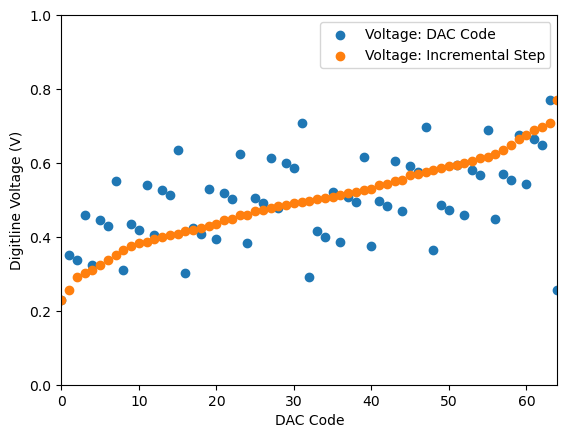

    DAC Code  Voltage_Code  Voltage_Step
0        0.0      0.228968      0.228968
1        1.0      0.351023      0.256915
2        2.0      0.336125      0.292632
3        3.0      0.458180      0.301482
4        4.0      0.323046      0.311564
..       ...           ...           ...
60      60.0      0.541820      0.676954
61      61.0      0.663875      0.688436
62      62.0      0.648977      0.698518
63      63.0      0.771032      0.707368
64      64.0      0.256915      0.771032

[65 rows x 3 columns]


In [4]:
# In-array CR-DAC
x2 = np.array([])
y2 = np.array([])
for code in range(0, 2 ** DAC_bw + 1):
    Code_str = list(bin(code)[2:].zfill(DAC_bw))
    DAC_code = [int(code) for code in Code_str]
    Vdl = Res_DAC
    for i in range(0, len(DAC_code)):
        Vdl = ((Cs * DAC_code[i]) + ((Cd + Caablt) * Vdl)) / (Cs + (Cd + Caablt))
    x2 = np.append(x2, code)
    y2 = np.append(y2, Vdl)
y2_sort = np.sort(y2)

plt.scatter(x2, y2, label = 'Voltage: DAC Code')
plt.xlabel("DAC Code")
plt.ylabel("Digitline Voltage (V)")
plt.xlim(0, 2 ** DAC_bw)
plt.ylim(0, 1)
plt.scatter(x2, y2_sort, label = 'Voltage: Incremental Step')
plt.legend()
plt.show()

CR_DAC_Xport = pd.DataFrame([x2, y2, y2_sort], index = ['DAC Code', 'Voltage_Code', 'Voltage_Step']).transpose()
print(CR_DAC_Xport)
#DAC_Xport.to_CSV('DAC_Xport.csv')

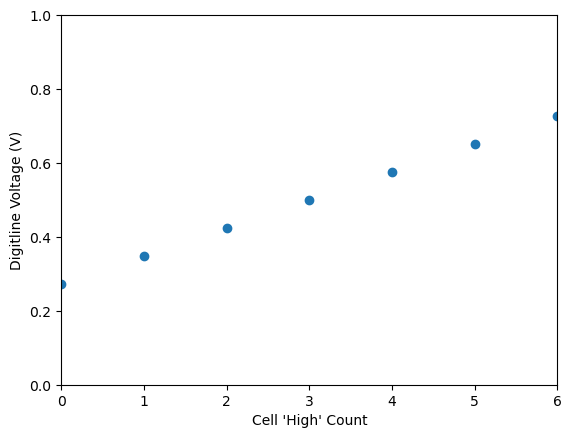

   C1 Count   Voltage
0       0.0  0.272607
1       1.0  0.348405
2       2.0  0.424202
3       3.0  0.500000
4       4.0  0.575798
5       5.0  0.651595
6       6.0  0.727393


In [5]:
# In-array CS-DAC
x3 = np.array([])
y3 = np.array([])
for cnt_1 in range(0, DAC_bw + 1):
    cnt_0 = DAC_bw - cnt_1
    Vdl = Res_MAC
    Cdl = Cd_p_C * nDL + Caablt
    Vdl = ((cnt_1 * 1 * Cs) + (Cdl * Vdl) + (cnt_0 * 0 * Cs)) / (DAC_bw * Cs + Cdl)
    x3 = np.append(x3, cnt_1)
    y3 = np.append(y3, Vdl)
    
plt.scatter(x3, y3)
plt.xlabel("Cell 'High' Count")
plt.ylabel("Digitline Voltage (V)")
plt.xlim(0, DAC_bw)
plt.ylim(0, 1)
plt.show()

CS_DAC_Xport = pd.DataFrame([x3, y3], index = ['C1 Count', 'Voltage']).transpose()
print(CS_DAC_Xport)
#DLA_Xport.to_CSV('DLA_Xport.csv')